In [1]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df_1 = pd.read_csv("gs://msca-bdp-student-gcs/Group4_Project_Data/amazon_reviews_us_Automotive_v1_00.tsv", sep='\t', error_bad_lines=False)

b'Skipping line 32293: expected 15 fields, saw 22\nSkipping line 37769: expected 15 fields, saw 22\n'
b'Skipping line 93174: expected 15 fields, saw 22\nSkipping line 128815: expected 15 fields, saw 22\n'
b'Skipping line 141887: expected 15 fields, saw 22\nSkipping line 147961: expected 15 fields, saw 22\nSkipping line 152729: expected 15 fields, saw 22\nSkipping line 162854: expected 15 fields, saw 22\nSkipping line 166656: expected 15 fields, saw 22\nSkipping line 182051: expected 15 fields, saw 22\n'
b'Skipping line 220511: expected 15 fields, saw 22\nSkipping line 222466: expected 15 fields, saw 22\n'
b'Skipping line 271740: expected 15 fields, saw 22\nSkipping line 290308: expected 15 fields, saw 22\nSkipping line 306805: expected 15 fields, saw 22\nSkipping line 310772: expected 15 fields, saw 22\nSkipping line 315182: expected 15 fields, saw 22\nSkipping line 323931: expected 15 fields, saw 22\n'
b'Skipping line 348448: expected 15 fields, saw 22\nSkipping line 350216: expected 

In [3]:
df_1

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,36075342,RAB23OVFNCXZQ,B00LPRXQ4Y,339193102,"17"" 2003-2006 Ford EXPEDITION Ford F150 2004-2...",Automotive,1,0.0,0.0,N,Y,"As it was used,","As it was used, the method that Ford used to a...",2015-08-31
1,US,42462164,R3NORADVJO6IE6,B000C7S0TO,907684644,Spectra Premium CU1909 Complete Radiator for T...,Automotive,5,0.0,0.0,N,Y,Five Stars,"Put it in fine, no problems. Shipping was dece...",2015-08-31
2,US,21241933,R299F4SO98S5OO,B000CO9WE4,752246352,K&N E-4665 High Performance Replacement Indust...,Automotive,5,1.0,1.0,N,Y,Great fit and performance on the surface drive...,Fit wonderfully on my 36HP Pro-Drive motor.,2015-08-31
3,US,52570308,R2DA9DOT03UW6I,B000GKD5NI,105401756,Suncutters Rear Window Shade,Automotive,5,2.0,3.0,N,Y,Good for the price. Fits fairly good on 2010 T...,Good for the price! So far I have put it up i...,2015-08-31
4,US,38200102,R2OGCH681EQHU6,B009SDA7TE,728471129,Lug Nuts Landcruiser Tundra OEM Mag 14x1.5 Thr...,Automotive,5,0.0,0.0,N,Y,Five Stars,Fit perfectly on my 2012 Tundra with stock alu...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510890,US,51991982,R3GVXVPBFW5AU9,B0000302TY,765278175,"Ridgid 72927 Vt2525Rt Noise Muffler,",Automotive,4,5.0,6.0,N,N,Works Well,I got this for the sears 6 hp shop vac with de...,1999-12-24
3510891,US,53030488,R2PUPCH64VV0KA,B00000K3S6,832855193,Bulldog 2002Pro Talking Car Alarm,Automotive,1,12.0,13.0,N,N,How Loud is Loud?,I noticed when reading the product's specifica...,1999-12-16
3510892,US,52035459,R3SPUAB0NVAB0O,B00000K3S6,832855193,Bulldog 2002Pro Talking Car Alarm,Automotive,5,17.0,20.0,N,N,THE BEST FOR THE $$$,"As a professional car stereo technician, I hav...",1999-12-10
3510893,US,53082903,R2O7ALEKWVTK9N,B0000302TY,765278175,"Ridgid 72927 Vt2525Rt Noise Muffler,",Automotive,2,20.0,23.0,N,N,Only makes a difference outdoors,Most of the noise coming from the vaccuum come...,1999-12-06


<AxesSubplot:>

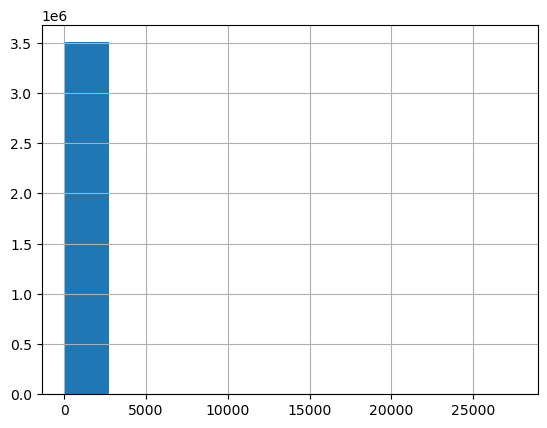

In [4]:
df_1['review_body'].str.len().hist()

In [7]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

df_1['review_body'] = df_1['review_body'].apply(punctuation_removal)

NameError: name 'string' is not defined

In [10]:
df_1.dtypes

marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating           object
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object

In [3]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()


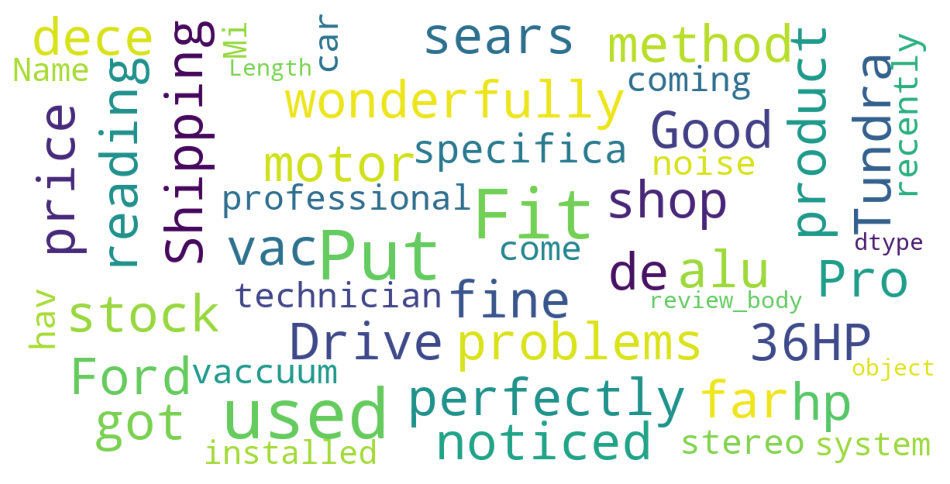

In [14]:
import matplotlib.pyplot as plt
show_wordcloud(df_1['review_body'])

In [3]:
df_2 = pd.read_csv("gs://msca-bdp-student-gcs/Group4_Project_Data/amazon_reviews_us_Beauty_v1_00.tsv", sep='\t', error_bad_lines=False)

b'Skipping line 10093: expected 15 fields, saw 22\nSkipping line 31965: expected 15 fields, saw 22\nSkipping line 49886: expected 15 fields, saw 22\nSkipping line 49905: expected 15 fields, saw 22\n'
b'Skipping line 67579: expected 15 fields, saw 22\nSkipping line 75367: expected 15 fields, saw 22\nSkipping line 92462: expected 15 fields, saw 22\nSkipping line 105041: expected 15 fields, saw 22\nSkipping line 109697: expected 15 fields, saw 22\nSkipping line 121931: expected 15 fields, saw 22\n'
b'Skipping line 139492: expected 15 fields, saw 22\nSkipping line 158729: expected 15 fields, saw 22\nSkipping line 165784: expected 15 fields, saw 22\nSkipping line 176996: expected 15 fields, saw 22\nSkipping line 182928: expected 15 fields, saw 22\nSkipping line 195841: expected 15 fields, saw 22\n'
b'Skipping line 196938: expected 15 fields, saw 22\nSkipping line 202535: expected 15 fields, saw 22\nSkipping line 261147: expected 15 fields, saw 22\n'
b'Skipping line 265777: expected 15 field

In [4]:
import matplotlib.pyplot as plt

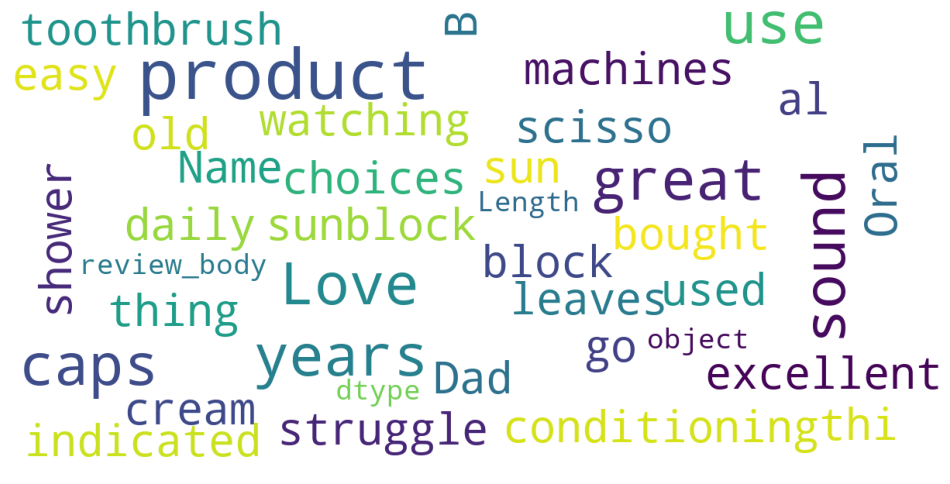

In [8]:
show_wordcloud(df_2['review_body'])

In [2]:
df_3 = pd.read_csv("gs://msca-bdp-student-gcs/Group4_Project_Data/amazon_reviews_us_Sports_v1_00.tsv", sep='\t', error_bad_lines=False)

b'Skipping line 7549: expected 15 fields, saw 22\nSkipping line 27856: expected 15 fields, saw 22\nSkipping line 53399: expected 15 fields, saw 22\n'
b'Skipping line 76073: expected 15 fields, saw 22\nSkipping line 89612: expected 15 fields, saw 22\nSkipping line 93502: expected 15 fields, saw 22\nSkipping line 96533: expected 15 fields, saw 22\nSkipping line 107777: expected 15 fields, saw 22\nSkipping line 114290: expected 15 fields, saw 22\nSkipping line 118937: expected 15 fields, saw 22\n'
b'Skipping line 175061: expected 15 fields, saw 22\nSkipping line 185159: expected 15 fields, saw 22\nSkipping line 191448: expected 15 fields, saw 22\n'
b'Skipping line 217523: expected 15 fields, saw 22\nSkipping line 217618: expected 15 fields, saw 22\nSkipping line 238480: expected 15 fields, saw 22\nSkipping line 242797: expected 15 fields, saw 22\nSkipping line 258855: expected 15 fields, saw 22\n'
b'Skipping line 274223: expected 15 fields, saw 22\nSkipping line 284977: expected 15 fields

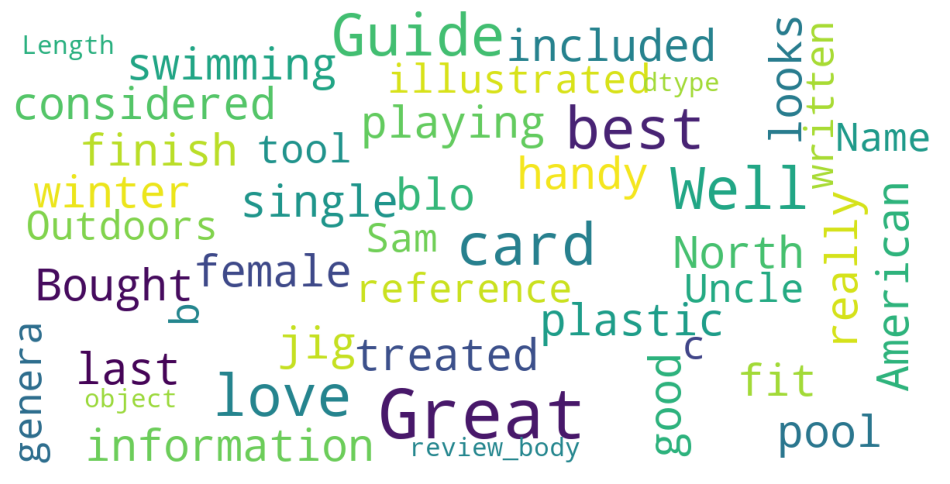

In [5]:
show_wordcloud(df_3['review_body'])

In [3]:
df_4 = pd.read_csv("gs://msca-bdp-student-gcs/Group4_Project_Data/amazon_reviews_us_Pet_Products_v1_00.tsv", sep='\t', error_bad_lines=False)

b'Skipping line 21404: expected 15 fields, saw 22\nSkipping line 31839: expected 15 fields, saw 22\nSkipping line 37779: expected 15 fields, saw 22\nSkipping line 38344: expected 15 fields, saw 22\nSkipping line 61449: expected 15 fields, saw 22\n'
b'Skipping line 80975: expected 15 fields, saw 22\nSkipping line 85603: expected 15 fields, saw 22\nSkipping line 95950: expected 15 fields, saw 22\nSkipping line 105132: expected 15 fields, saw 22\nSkipping line 115378: expected 15 fields, saw 22\n'
b'Skipping line 152632: expected 15 fields, saw 22\nSkipping line 159310: expected 15 fields, saw 22\nSkipping line 162724: expected 15 fields, saw 22\nSkipping line 168588: expected 15 fields, saw 22\nSkipping line 170412: expected 15 fields, saw 22\nSkipping line 187169: expected 15 fields, saw 22\n'
b'Skipping line 205461: expected 15 fields, saw 22\nSkipping line 210928: expected 15 fields, saw 22\nSkipping line 213691: expected 15 fields, saw 22\nSkipping line 228697: expected 15 fields, sa

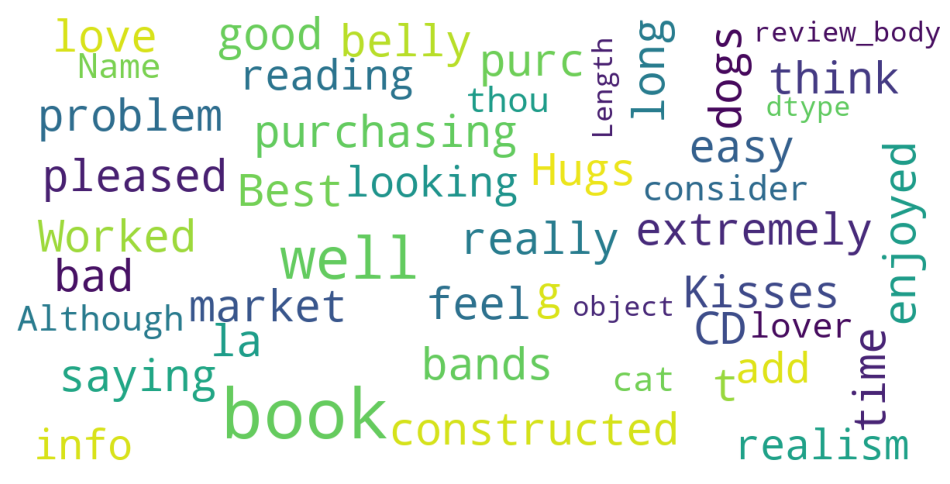

In [5]:
show_wordcloud(df_4['review_body'])

In [2]:
df_5 = pd.read_csv("gs://msca-bdp-student-gcs/Group4_Project_Data/amazon_reviews_us_Toys_v1_00.tsv", sep='\t', error_bad_lines=False)

b'Skipping line 7003: expected 15 fields, saw 22\nSkipping line 22430: expected 15 fields, saw 22\nSkipping line 25418: expected 15 fields, saw 22\nSkipping line 43786: expected 15 fields, saw 22\nSkipping line 46566: expected 15 fields, saw 22\nSkipping line 63511: expected 15 fields, saw 22\n'
b'Skipping line 69097: expected 15 fields, saw 22\nSkipping line 74615: expected 15 fields, saw 22\nSkipping line 79354: expected 15 fields, saw 22\nSkipping line 81566: expected 15 fields, saw 22\nSkipping line 89464: expected 15 fields, saw 22\nSkipping line 93104: expected 15 fields, saw 22\nSkipping line 95570: expected 15 fields, saw 22\nSkipping line 96587: expected 15 fields, saw 22\nSkipping line 102117: expected 15 fields, saw 22\nSkipping line 121288: expected 15 fields, saw 22\n'
b'Skipping line 144424: expected 15 fields, saw 22\nSkipping line 168191: expected 15 fields, saw 22\nSkipping line 173291: expected 15 fields, saw 22\n'
b'Skipping line 199932: expected 15 fields, saw 22\nS

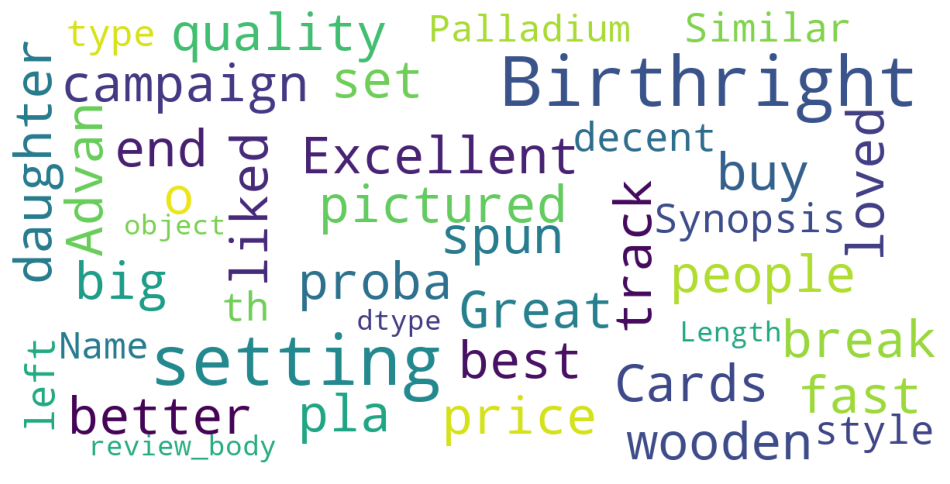

In [5]:
show_wordcloud(df_5['review_body'])